In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
y, p = sp.symbols('y p')

# Définition de la fonction de perte ECB
L = -y * sp.log(p) - (1 - y) * sp.log(1 - p)

# Calcul de la dérivée par rapport à p (gradient)
gradient_p = sp.diff(L, p)

# Affichage des résultats
print("=== Question 1 : Gradient de l'ECB ===")
print("Fonction de perte ECB :")
sp.pprint(L)
print("\nGradient par rapport à p :")
sp.pprint(gradient_p)
print("\nInterprétation : Le gradient est (1-y)/(1-p) - y/p, ce qui correspond à la dérivée analytique.")
print("Pour y=0, le gradient est 1/(1-p). Pour y=1, le gradient est -1/p.")


=== Question 1 : Gradient de l'ECB ===
Fonction de perte ECB :
-y⋅log(p) - (1 - y)⋅log(1 - p)

Gradient par rapport à p :
1 - y   y
───── - ─
1 - p   p

Interprétation : Le gradient est (1-y)/(1-p) - y/p, ce qui correspond à la dérivée analytique.
Pour y=0, le gradient est 1/(1-p). Pour y=1, le gradient est -1/p.


In [3]:
# Calcul de la seconde dérivée par rapport à p
hessian_p = sp.diff(gradient_p, p)

# Affichage des résultats
print("\n=== Question 2 : Convexité de l'ECB ===")
print("Hessienne par rapport à p :")
sp.pprint(hessian_p)
print("\nAnalyse de la convexité :")
print("La Hessienne est (1-y)/(1-p)^2 + y/p^2.")
print("Pour p ∈ (0,1) et y ∈ {0,1} :")
print("- Si y=0 : Hessienne = 1/(1-p)^2 > 0")
print("- Si y=1 : Hessienne = 1/p^2 > 0")
print("La Hessienne est toujours positive, donc l'ECB est strictement convexe en p.")



=== Question 2 : Convexité de l'ECB ===
Hessienne par rapport à p :
 1 - y     y 
──────── + ──
       2    2
(1 - p)    p 

Analyse de la convexité :
La Hessienne est (1-y)/(1-p)^2 + y/p^2.
Pour p ∈ (0,1) et y ∈ {0,1} :
- Si y=0 : Hessienne = 1/(1-p)^2 > 0
- Si y=1 : Hessienne = 1/p^2 > 0
La Hessienne est toujours positive, donc l'ECB est strictement convexe en p.


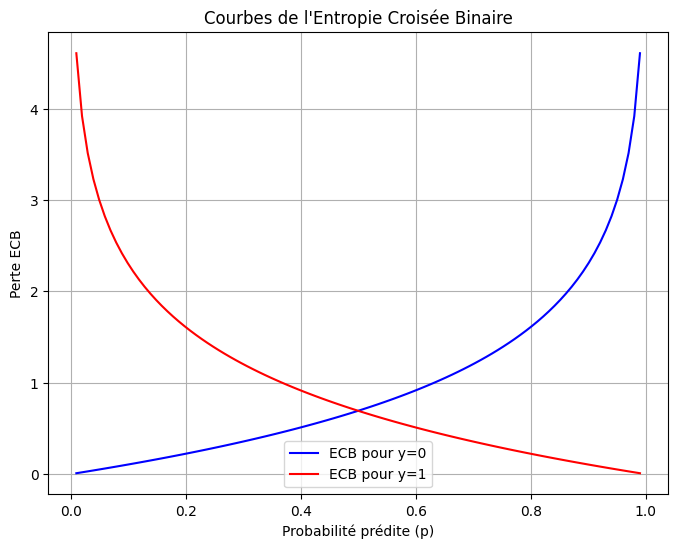

In [4]:
def binary_cross_entropy(y, p):
    """
    Calcule l'ECB pour un y donné et un tableau de p.
    Évite les erreurs de log(0) en clipsant p.
    """
    p = np.clip(p, 1e-15, 1 - 1e-15)  # Éviter log(0)
    return -y * np.log(p) - (1 - y) * np.log(1 - p)

# Création des points pour la visualisation
p_values = np.linspace(0.01, 0.99, 100)
loss_y0 = binary_cross_entropy(0, p_values)  # Perte pour y=0
loss_y1 = binary_cross_entropy(1, p_values)  # Perte pour y=1

# Tracé des courbes
plt.figure(figsize=(8, 6))
plt.plot(p_values, loss_y0, label='ECB pour y=0', color='blue')
plt.plot(p_values, loss_y1, label='ECB pour y=1', color='red')
plt.xlabel('Probabilité prédite (p)')
plt.ylabel('Perte ECB')
plt.title('Courbes de l\'Entropie Croisée Binaire')
plt.legend()
plt.grid(True)
plt.show()


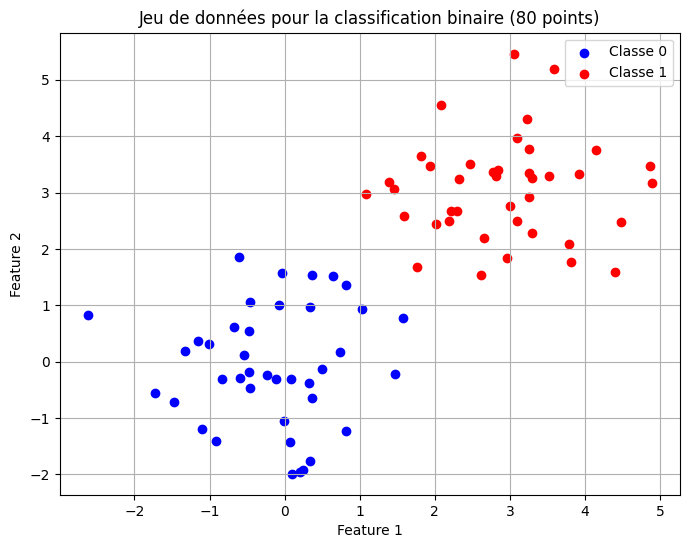

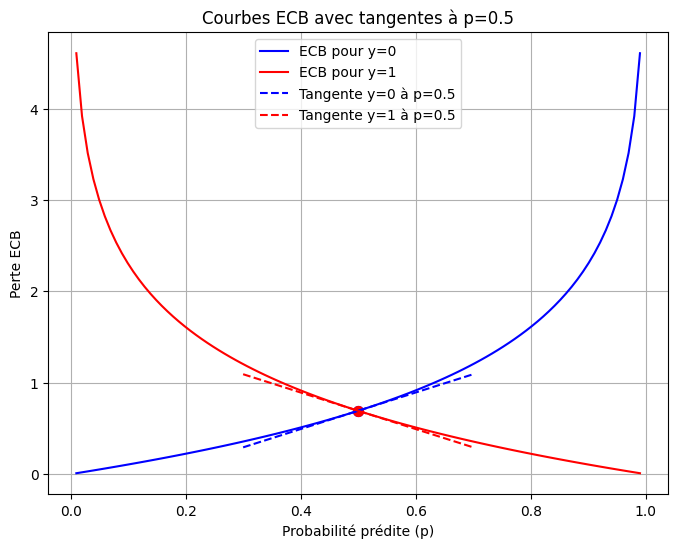


=== Question 3(b) : Équations des tangentes ===
Pour y=0 à p=0.5 : L(p) = 0.693 + 2.000(p - 0.5)
Pour y=1 à p=0.5 : L(p) = 0.693 + -2.000(p - 0.5)


In [5]:
# Génération du jeu de données (classification binaire)
X, y = make_blobs(n_samples=80, n_features=2, centers=[[0, 0], [3, 3]], cluster_std=1.0, random_state=42)

# Visualisation du jeu de données
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Classe 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Jeu de données pour la classification binaire (80 points)')
plt.legend()
plt.grid(True)
plt.show()

# Calcul des tangentes à p=0.5
p_tangent = 0.5
# Pour y=1
loss_y1_p05 = binary_cross_entropy(1, p_tangent)  # Valeur de la perte à p=0.5
gradient_y1_p05 = -1 / p_tangent  # Gradient pour y=1 : -1/p
tangent_y1 = lambda p: loss_y1_p05 + gradient_y1_p05 * (p - p_tangent)  # Équation de la tangente
# Pour y=0
loss_y0_p05 = binary_cross_entropy(0, p_tangent)  # Valeur de la perte à p=0.5
gradient_y0_p05 = 1 / (1 - p_tangent)  # Gradient pour y=0 : 1/(1-p)
tangent_y0 = lambda p: loss_y0_p05 + gradient_y0_p05 * (p - p_tangent)  # Équation de la tangente

# Tracé des courbes avec tangentes
p_tangent_values = np.linspace(0.3, 0.7, 50)
plt.figure(figsize=(8, 6))
plt.plot(p_values, loss_y0, label='ECB pour y=0', color='blue')
plt.plot(p_values, loss_y1, label='ECB pour y=1', color='red')
plt.plot(p_tangent_values, tangent_y0(p_tangent_values), '--', label='Tangente y=0 à p=0.5', color='blue')
plt.plot(p_tangent_values, tangent_y1(p_tangent_values), '--', label='Tangente y=1 à p=0.5', color='red')
plt.scatter([p_tangent], [loss_y0_p05], color='blue', s=50)  # Point de tangence
plt.scatter([p_tangent], [loss_y1_p05], color='red', s=50)   # Point de tangence
plt.xlabel('Probabilité prédite (p)')
plt.ylabel('Perte ECB')
plt.title('Courbes ECB avec tangentes à p=0.5')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des équations des tangentes
print("\n=== Question 3(b) : Équations des tangentes ===")
print(f"Pour y=0 à p=0.5 : L(p) = {loss_y0_p05:.3f} + {gradient_y0_p05:.3f}(p - 0.5)")
print(f"Pour y=1 à p=0.5 : L(p) = {loss_y1_p05:.3f} + {gradient_y1_p05:.3f}(p - 0.5)")